## Blood donation Prediction

##Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model


## 1. Problem Statement:

To develop a predictive model using the RFMTC framework that identifies the likelihood of a blood donor contributing blood in March 2007. The input features include:

* Recency (R): Months since the last donation.
* Frequency (F): Total number of donations.
* Monetary (M): Total blood donated in c.c.
* Time (T): Months since the first donation.
* Target Variable: Whether the donor donated blood in March 2007 (1 for yes, 0 for no).


## 2. Data collection

Data Source: https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center

## 2.1 Import Data and Required Files



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import the CSV data as pandas DataFrame


In [18]:
df=pd.read_csv('/content/transfusion.data', index_col=False)

## Show the Top 5 Records

In [19]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Shape of the data

In [5]:
df.shape

(748, 5)

## 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [21]:
# Assuming your DataFrame is named 'df'
df.columns = ['recency_months', 'frequency_times', 'monetary_cc_blood', 'time_months', 'donated_march_2007']


In [22]:
df.head()

,recency_months,frequency_times,monetary_cc_blood,time_months,donated_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## 3.1 Checking the missing values

In [24]:
df.isna().sum()

,0
recency_months,0
frequency_times,0
monetary_cc_blood,0
time_months,0
donated_march_2007,0


There are no missing values in the data

## 3.2 Check Duplicates

In [26]:
df.duplicated().sum()

215

215 Duplicates values were found

In [27]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

Dropped the duplicate values

In [33]:
df.shape

(533, 5)

## 3.3 DataType Checks

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 747
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   recency_months      533 non-null    int64
 1   frequency_times     533 non-null    int64
 2   monetary_cc_blood   533 non-null    int64
 3   time_months         533 non-null    int64
 4   donated_march_2007  533 non-null    int64
dtypes: int64(5)
memory usage: 25.0 KB


## 3.4 Check the number of unique values of each column

In [40]:
df.nunique()

,0
recency_months,31
frequency_times,33
monetary_cc_blood,33
time_months,78
donated_march_2007,2


## 3.5 Check statistics of data set

In [42]:
df.describe()

,recency_months,frequency_times,monetary_cc_blood,time_months,donated_march_2007
count,533.000000,533.000000,533.000000,533.000000,533.00000
mean,9.529081,6.990619,1747.654784,42.303940,0.27955
std,8.250860,6.265875,1566.468760,23.295291,0.44920
min,0.000000,1.000000,250.000000,2.000000,0.00000
25%,3.000000,3.000000,750.000000,26.000000,0.00000
50%,8.000000,5.000000,1250.000000,38.000000,0.00000
75%,14.000000,9.000000,2250.000000,58.000000,1.00000
max,74.000000,50.000000,12500.000000,98.000000,1.00000


## 4. Exploring Data ( Visualization )
## 4.1 Visualize average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)

## 4.1.1 Univariate Analysis Histogram & KDE

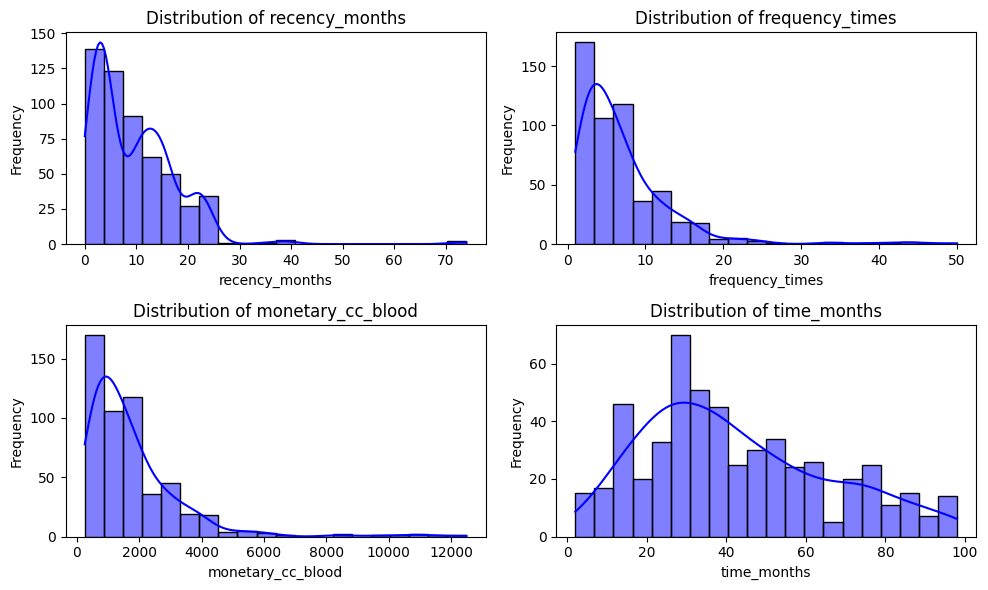

In [55]:
# Plot distributions for numerical columns
plt.figure(figsize=(10, 6))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude the target column
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## 4.2 Bivariate Analysis

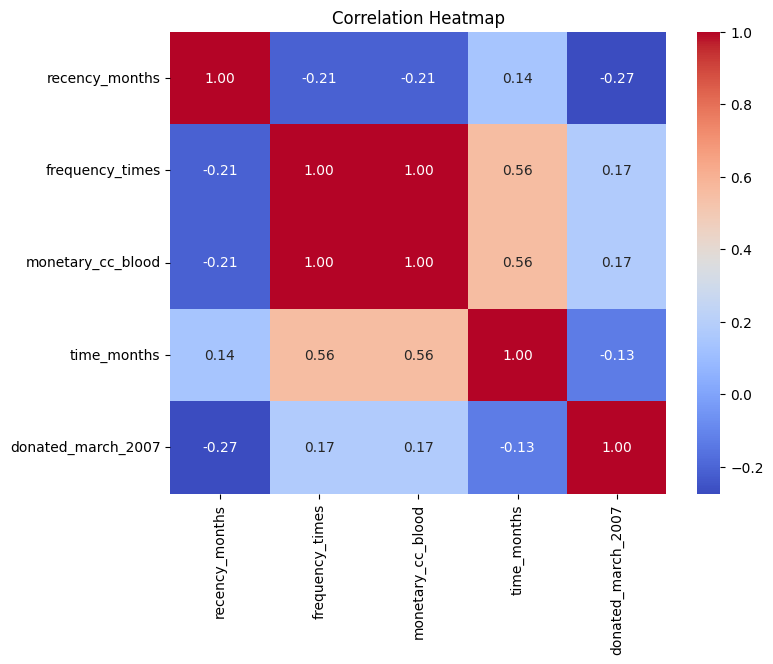

In [58]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [62]:
# Calculate correlations with the target variable
correlations = df.corr()['donated_march_2007'].drop('donated_march_2007')

# Sort correlations by absolute value in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Print the variables with the highest correlation in the order with their values
print("Variables with highest correlation to 'donated_march_2007':")
for variable, correlation in sorted_correlations.items():
    print(f"{variable}: {correlation}")

Variables with highest correlation to 'donated_march_2007':
recency_months: 0.27479909220037696
frequency_times: 0.17456981637313915
monetary_cc_blood: 0.1745698163731391
time_months: 0.13423579897876065


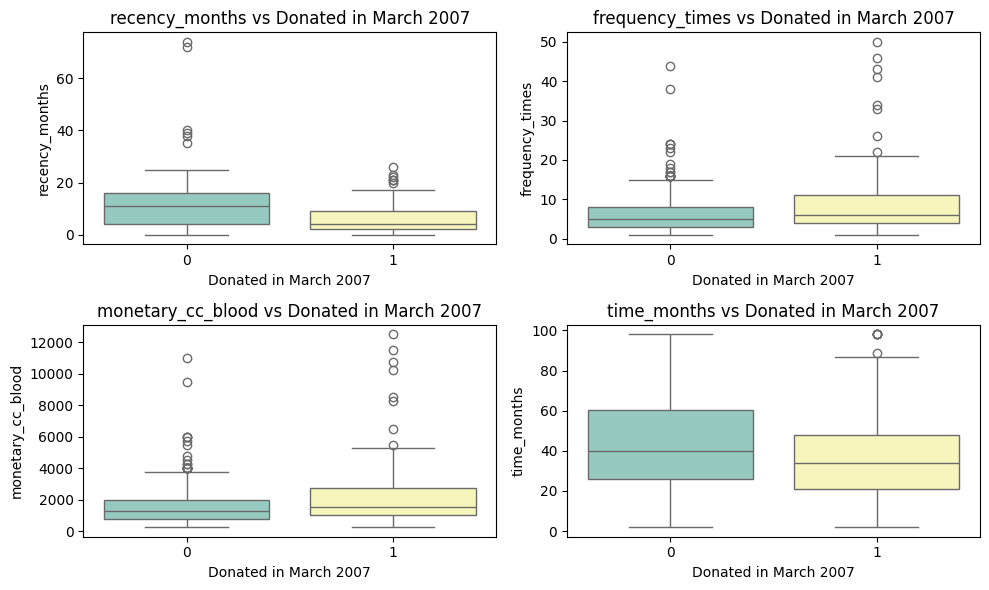

In [63]:
# Boxplots to compare features with the target variable
plt.figure(figsize=(10, 6))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude the target column
    plt.subplot(2, 2, i)
    sns.boxplot(x='donated_march_2007', y=col, data=df, palette='Set3')
    plt.title(f"{col} vs Donated in March 2007")
    plt.xlabel("Donated in March 2007")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## 4.3 Multivariate Analysis

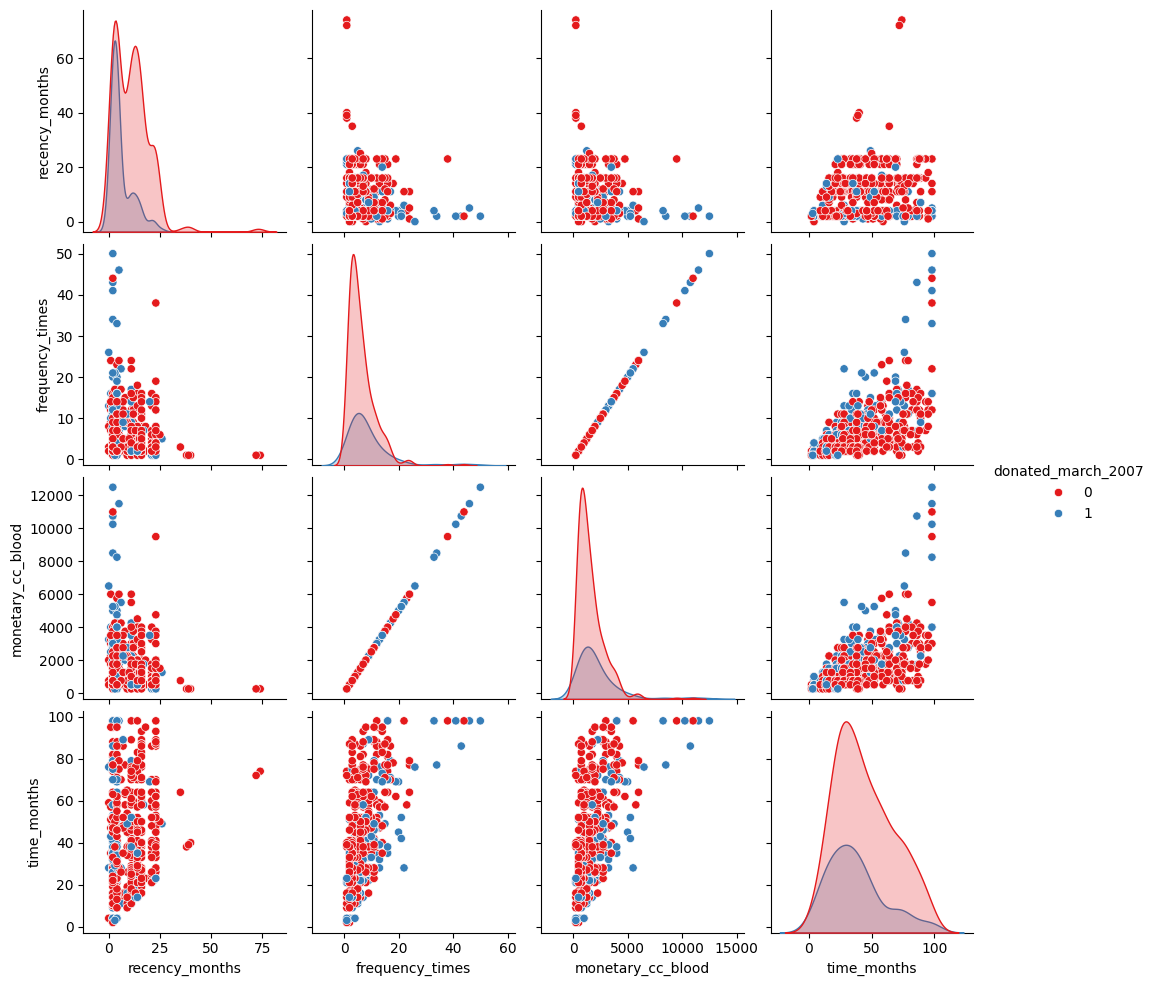

In [65]:
# Pairplot for visualizing relationships among multiple variables
sns.pairplot(df, hue='donated_march_2007', palette='Set1', diag_kind='kde')
plt.show()


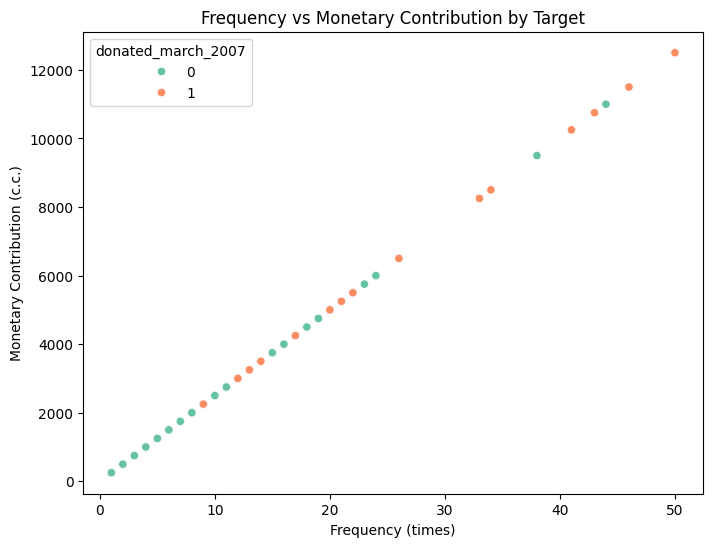

In [66]:
# Interaction between two numerical variables based on the target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='frequency_times', y='monetary_cc_blood', hue='donated_march_2007', data=df, palette='Set2')
plt.title("Frequency vs Monetary Contribution by Target")
plt.xlabel("Frequency (times)")
plt.ylabel("Monetary Contribution (c.c.)")
plt.show()